# ArbitraryOutlierCapper
The ArbitraryOutlierCapper() caps the maximum or minimum values of a variable
at an arbitrary value indicated by the user.

The user must provide the maximum or minimum values that will be used
to cap each variable in a dictionary {feature : capping_value}

### Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.outliers import ArbitraryOutlierCapper

In [2]:
# Load titanic dataset from OpenML

def load_titanic():
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = data.replace('?', np.nan)
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['embarked'].fillna('C', inplace=True)
    data['fare'] = data['fare'].astype('float')
    data['fare'].fillna(data['fare'].median(), inplace=True)
    data['age'] = data['age'].astype('float')
    data['age'].fillna(data['age'].median(), inplace=True)
    return data
# To plot histogram
def plot_hist(data, col):
    plt.figure(figsize=(8,5))
    plt.hist(data[col], bins=30)
    plt.title("Distribution of "+col)
    return plt.show()

In [3]:
data = load_titanic()
data.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
225,1,0,"Payne, Mr. Vivian Ponsonby",male,23.0,0,0,12749,93.5000,B,S,NaN,NaN,"Montreal, PQ"
167,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C,S,D,NaN,"New York, NY / Stamford CT"
807,3,0,"Ford, Miss. Robina Maggie 'Ruby'",female,9.0,2,2,W./C. 6608,34.3750,n,S,NaN,NaN,"Rotherfield, Sussex, England Essex Co, MA"
1094,3,1,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,n,S,NaN,NaN,NaN
541,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,n,S,11,NaN,"Plymouth, Devon / Detroit, MI"


In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data.drop(['survived', 'name', 'ticket'],axis=1),
                                                    data['survived'],
                                                    test_size=0.3, 
                                                    random_state=0)

print("train data:",X_train.shape)
print("test data:",X_test.shape)

train data: (916, 11)
test data: (393, 11)


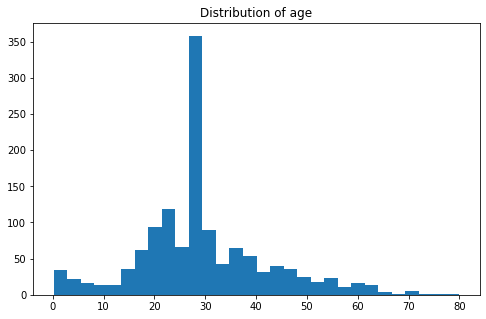

In [5]:
# Before capping
plot_hist(data,'age')

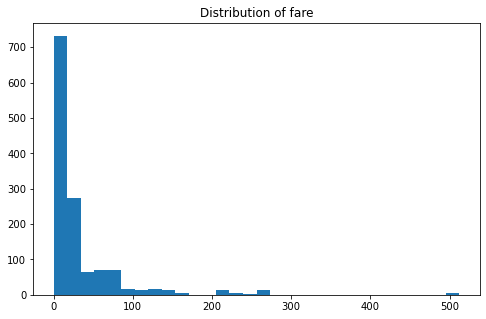

In [6]:
plot_hist(data, 'fare')

In [7]:
# let's find out the maximum&minimum Age and maximum Fare in the titanic
print("Max age:",data.age.max())
print("Max fare:",data.fare.max())
print("Min age:",data.age.min())
print("Min fare:",data.fare.min())

Max age: 80.0
Max fare: 512.3292
Min age: 0.1667
Min fare: 0.0


### Maximum capping

In [8]:
'''Parameters
----------
max_capping_dict : dictionary, default=None
    Dictionary containing the user specified capping values for the right tail of
    the distribution of each variable (maximum values).

min_capping_dict : dictionary, default=None
    Dictionary containing user specified capping values for the eft tail of the
    distribution of each variable (minimum values).

missing_values : string, default='raise'
    Indicates if missing values should be ignored or raised. If
    `missing_values='raise'` the transformer will return an error if the
    training or the datasets to transform contain missing values.
'''
capper = ArbitraryOutlierCapper(
    max_capping_dict={'age': 50, 'fare': 200}, min_capping_dict=None)

capper.fit(X_train)

ArbitraryOutlierCapper(max_capping_dict={'age': 50, 'fare': 200})

In [9]:
capper.right_tail_caps_

{'age': 50, 'fare': 200}

In [10]:
capper.left_tail_caps_

{}

In [11]:
train_t = capper.transform(X_train) 
test_t = capper.transform(X_test) 
#After capping
print("Max age:",train_t.age.max())
print("Max fare:",train_t.fare.max())

Max age: 50.0
Max fare: 200.0


### Minimum capping

In [12]:
capper = ArbitraryOutlierCapper(
    max_capping_dict=None,min_capping_dict={'age': 10,'fare': 100})
capper.fit(X_train)

ArbitraryOutlierCapper(min_capping_dict={'age': 10, 'fare': 100})

In [13]:
capper.right_tail_caps_

{}

In [14]:
capper.left_tail_caps_

{'age': 10, 'fare': 100}

In [15]:
train_t = capper.transform(X_train) 
test_t = capper.transform(X_test) 
#After capping
print("Min age:",train_t.age.min())
print("Min fare:",train_t.fare.min())

Min age: 10.0
Min fare: 100.0


### Both ends capping

In [16]:
capper = ArbitraryOutlierCapper(
    min_capping_dict={'age': 5, 'fare': 5},
     max_capping_dict={'age': 60, 'fare': 150})
capper.fit(X_train)

ArbitraryOutlierCapper(max_capping_dict={'age': 60, 'fare': 150},
                       min_capping_dict={'age': 5, 'fare': 5})

In [17]:
capper.right_tail_caps_

{'age': 60, 'fare': 150}

In [18]:
capper.left_tail_caps_

{'age': 5, 'fare': 5}

In [19]:
train_t = capper.transform(X_train) 
test_t = capper.transform(X_test) 
#After capping
print("Max age:",train_t.age.max())
print("Max fare:",train_t.fare.max())
print("Min age:",train_t.age.min())
print("Min fare:",train_t.fare.min())

Max age: 60.0
Max fare: 150.0
Min age: 5.0
Min fare: 5.0


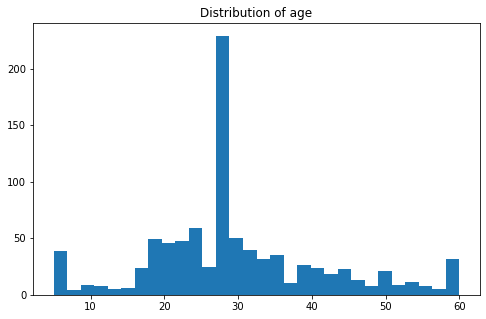

In [20]:
plot_hist(train_t,'age')

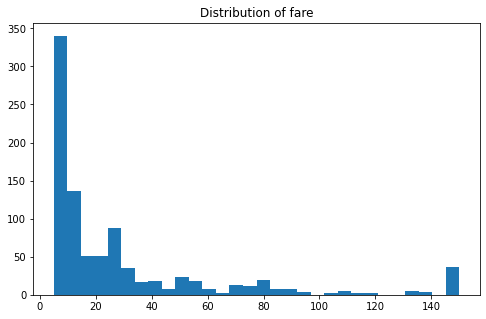

In [21]:
plot_hist(train_t, 'fare')